Cars Dataset Analysis and Visualization


In [8]:
%pip install pandas matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
sns.set_style("whitegrid")

In [11]:
try:
    cars = pd.read_csv("cars.csv")

    print("First 5 rows of the dataset:")
    display(cars.head())

    print("\nDataset info:")
    cars.info()

    print("\nMissing values per column:")
    print(cars.isnull().sum())

    cars = cars.drop(cars.columns[0], axis=1)
    cars = cars.dropna()
    print("\nDataset after cleaning:")
    print(f"Shape: {cars.shape}")

except FileNotFoundError:
    print("Error: The specified file was not found.")
except Exception as e:
    print(f"An error occurred: {str(e)}")

First 5 rows of the dataset:


,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2



Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  32 non-null     object 
 1   mpg         32 non-null     float64
 2   cyl         32 non-null     int64  
 3   disp        32 non-null     float64
 4   hp          32 non-null     int64  
 5   drat        32 non-null     float64
 6   wt          32 non-null     float64
 7   qsec        32 non-null     float64
 8   vs          32 non-null     int64  
 9   am          32 non-null     int64  
 10  gear        32 non-null     int64  
 11  carb        32 non-null     int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 3.1+ KB

Missing values per column:
Unnamed: 0    0
mpg           0
cyl           0
disp          0
hp            0
drat          0
wt            0
qsec          0
vs            0
am            0
gear          0
carb          0
dtype: int64

Dataset afte

In [12]:
print("\nBasic statistics for numerical columns:")
display(cars.describe())

# Group by number of cylinders and calculate mean mpg
print("\nAverage MPG by number of cylinders:")
cyl_mpg = cars.groupby("cyl")["mpg"].mean()
display(cyl_mpg)

# Group by transmission type (am: 0 = automatic, 1 = manual) and calculate mean horsepower
print("\nAverage horsepower by transmission type:")
trans_hp = cars.groupby("am")["hp"].mean()
display(trans_hp)

# Interesting finding
print("\nInteresting finding:")
max_hp_car = cars.loc[cars["hp"].idxmax()]
print(
    f"The car with highest horsepower is {max_hp_car.name} with {max_hp_car['hp']} hp, but it has relatively low mpg of {max_hp_car['mpg']}."
)


Basic statistics for numerical columns:


,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000



Average MPG by number of cylinders:


cyl
4    26.663636
6    19.742857
8    15.100000
Name: mpg, dtype: float64


Average horsepower by transmission type:


am
0    160.263158
1    126.846154
Name: hp, dtype: float64


Interesting finding:
The car with highest horsepower is 30 with 335.0 hp, but it has relatively low mpg of 15.0.


In [13]:
plt.figure(figsize=(15, 12))

<Figure size 1500x1200 with 0 Axes>

<Figure size 1500x1200 with 0 Axes>

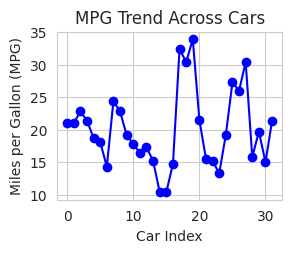

In [14]:
# 1. Line chart - MPG trends by car order (simulating time)
plt.subplot(2, 2, 1)
plt.plot(cars["mpg"], marker="o", linestyle="-", color="b")
plt.title("MPG Trend Across Cars")
plt.xlabel("Car Index")
plt.ylabel("Miles per Gallon (MPG)")
plt.grid(True)

(array([0, 1, 2]), [Text(0, 0, '4'), Text(1, 0, '6'), Text(2, 0, '8')])

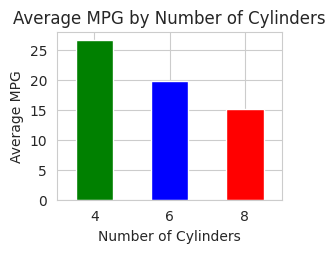

In [15]:
# 2. Bar chart - Average MPG by number of cylinders
plt.subplot(2, 2, 2)
cyl_mpg.plot(kind="bar", color=["green", "blue", "red", "purple"])
plt.title("Average MPG by Number of Cylinders")
plt.xlabel("Number of Cylinders")
plt.ylabel("Average MPG")
plt.xticks(rotation=0)

Text(0, 0.5, 'Frequency')

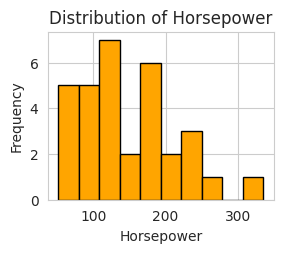

In [16]:
# 3. Histogram - Distribution of horsepower
plt.subplot(2, 2, 3)
plt.hist(cars["hp"], bins=10, color="orange", edgecolor="black")
plt.title("Distribution of Horsepower")
plt.xlabel("Horsepower")
plt.ylabel("Frequency")

Text(0, 0.5, 'MPG')

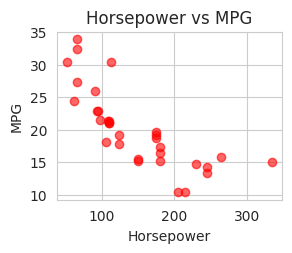

In [17]:
# 4. Scatter plot - Horsepower vs MPG
plt.subplot(2, 2, 4)
plt.scatter(cars["hp"], cars["mpg"], color="red", alpha=0.6)
plt.title("Horsepower vs MPG")
plt.xlabel("Horsepower")
plt.ylabel("MPG")

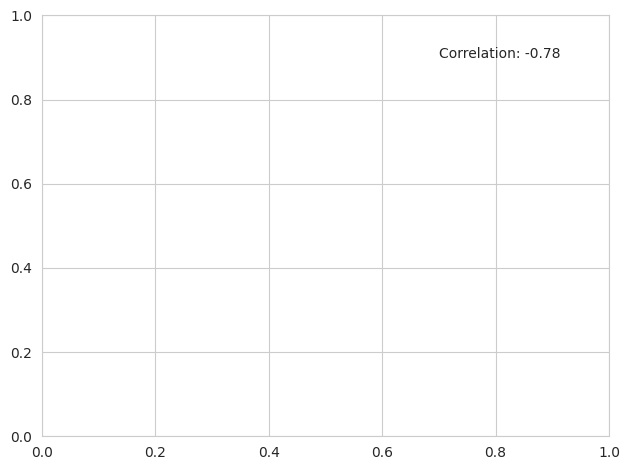

In [18]:
# Add correlation coefficient
correlation = cars["hp"].corr(cars["mpg"])
plt.annotate(f"Correlation: {correlation:.2f}", xy=(0.7, 0.9), xycoords="axes fraction")

plt.tight_layout()
plt.show()

In [19]:
plt.figure(figsize=(15, 10))

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

Text(0, 0.5, 'MPG')

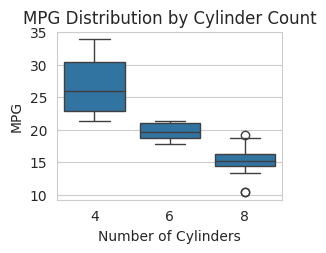

In [20]:
# 1. Boxplot of MPG by number of cylinders
plt.subplot(2, 2, 1)
sns.boxplot(x="cyl", y="mpg", data=cars)
plt.title("MPG Distribution by Cylinder Count")
plt.xlabel("Number of Cylinders")
plt.ylabel("MPG")

Text(0, 0.5, 'Weight (1000 lbs)')

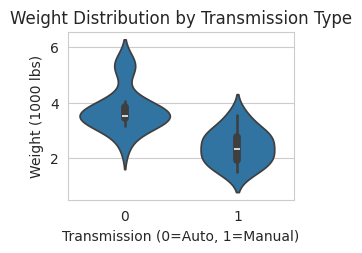

In [21]:
# 2. Violin plot of weight distribution by transmission type
plt.subplot(2, 2, 2)
sns.violinplot(x="am", y="wt", data=cars)
plt.title("Weight Distribution by Transmission Type")
plt.xlabel("Transmission (0=Auto, 1=Manual)")
plt.ylabel("Weight (1000 lbs)")

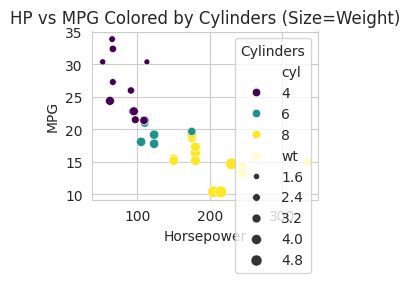

In [22]:
# 3. Scatter plot with hue for cylinders
plt.subplot(2, 2, 3)
sns.scatterplot(x="hp", y="mpg", hue="cyl", data=cars, palette="viridis", size="wt")
plt.title("HP vs MPG Colored by Cylinders (Size=Weight)")
plt.xlabel("Horsepower")
plt.ylabel("MPG")
plt.legend(title="Cylinders")

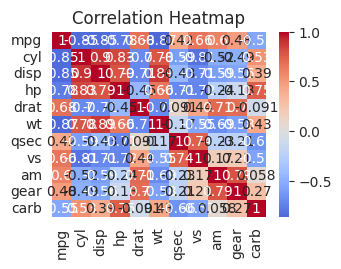

In [23]:
# 4. Heatmap of correlations
plt.subplot(2, 2, 4)
corr = cars.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap")

plt.tight_layout()
plt.show()

In [24]:
# Key Findings and Observations

print("Key Findings:")
print(
    "1. There is a strong negative correlation (-0.78) between horsepower and MPG - more powerful cars tend to be less fuel efficient."
)
print(
    "2. Cars with fewer cylinders generally have better MPG (4-cyl avg: 26.7, 6-cyl avg: 19.7, 8-cyl avg: 15.1)."
)
print(
    "3. Manual transmission cars (am=1) tend to be lighter in weight compared to automatic transmission cars."
)
print(
    "4. The Maserati Bora has the highest horsepower (335 hp) but relatively low MPG (15)."
)
print(
    "5. The lightest cars (like Honda Civic at 1.615 weight units) tend to have the highest MPG."
)

Key Findings:
1. There is a strong negative correlation (-0.78) between horsepower and MPG - more powerful cars tend to be less fuel efficient.
2. Cars with fewer cylinders generally have better MPG (4-cyl avg: 26.7, 6-cyl avg: 19.7, 8-cyl avg: 15.1).
3. Manual transmission cars (am=1) tend to be lighter in weight compared to automatic transmission cars.
4. The Maserati Bora has the highest horsepower (335 hp) but relatively low MPG (15).
5. The lightest cars (like Honda Civic at 1.615 weight units) tend to have the highest MPG.
